# Image Classification

download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).


In [1]:
import tensorflow.contrib.slim as slim
from model.small_inceptin_resnet import *

In [3]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [05:30, 515kB/s]                                                                                                                                                                                                    


All files found!



Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 555:
Image - Min Value: 3 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


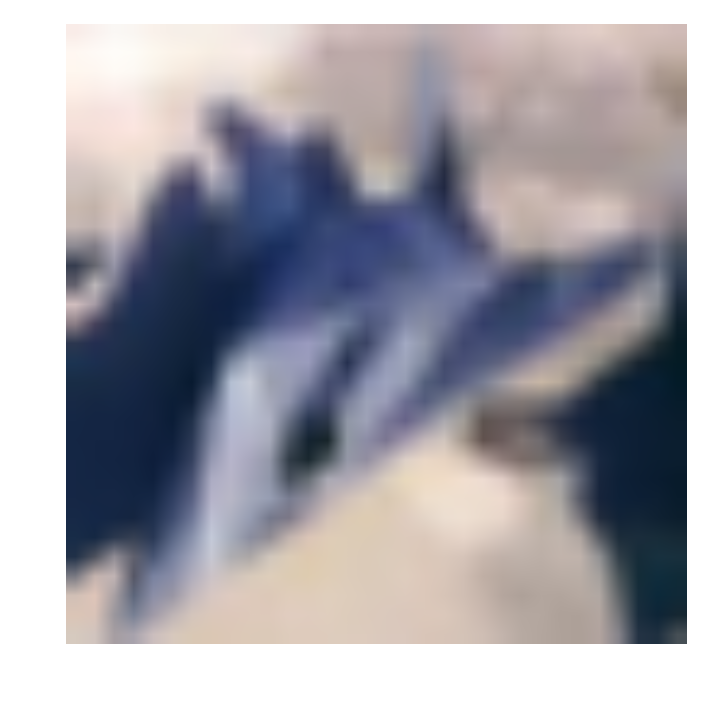

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 555
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [10]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    print("normalize x.shape = ",x.shape)
    return (x - 127) / 225.0


# tests.test_normalize(normalize)

In [11]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
#     print(x.shape)
   
    m = len(x)
    print('one_hot_encode y leng  = ',m)
    unit = np.eye(10)
    out = np.zeros((m,10))
    for i in range(0,m):
        out[i] = unit[x[i],:]
    #print('out shape  = ',out.shape)    
    return out


tests.test_one_hot_encode(one_hot_encode)

one_hot_encode y leng  =  574
one_hot_encode y leng  =  5
Tests Passed


In [12]:
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

normalize x.shape =  (9000, 32, 32, 3)
one_hot_encode y leng  =  9000
normalize x.shape =  (9000, 32, 32, 3)
one_hot_encode y leng  =  9000
normalize x.shape =  (9000, 32, 32, 3)
one_hot_encode y leng  =  9000
normalize x.shape =  (9000, 32, 32, 3)
one_hot_encode y leng  =  9000
normalize x.shape =  (9000, 32, 32, 3)
one_hot_encode y leng  =  9000
normalize x.shape =  (5000, 32, 32, 3)
one_hot_encode y leng  =  5000
normalize x.shape =  (10000, 32, 32, 3)
one_hot_encode y leng  =  10000


In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))
print('valid_features.shape = ',valid_features.shape)

valid_features.shape =  (5000, 32, 32, 3)


In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    print(image_shape)
    # TODO: Implement Function
    
    return tf.placeholder(dtype=tf.float32,shape=(None,*image_shape),name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(dtype=tf.float32,shape=(None,n_classes),name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(dtype=tf.float32,name='keep_prob')

def neural_net_regulation_scale():
    return tf.placeholder(dtype=tf.float32,name='reguloss')

def neural_new_is_training():
    return tf.placeholder(dtype=tf.bool,name='is_training')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

(32, 32, 3)
Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


In [8]:
tf.Variable(tf.random_normal((2,6)))[1]

<tf.Tensor 'strided_slice:0' shape=(6,) dtype=float32>

In [9]:
def conv2d_mine(x_tensor, conv_num_outputs, conv_ksize, conv_strides,is_training):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    print('conv2d x_tensor shape = ',x_tensor.shape)
    print('conv2d conv_num_outputs = ',conv_num_outputs)
    print('conv2dconv_ksize = ',conv_ksize)
    print('conv2d conv_strides = ',conv_strides)
    
    padding = 'SAME'
    s = x_tensor.get_shape().as_list() 

    weight = tf.Variable(tf.random_normal((conv_ksize[0],conv_ksize[1],s[3],conv_num_outputs)) * 
                         np.sqrt(2 /(conv_ksize[0]*conv_ksize[1]*s[3] )))
#     bias = tf.Variable(tf.zeros(conv_num_outputs))
    out = tf.nn.conv2d(x_tensor,weight,[1,conv_strides[0],conv_strides[1],1] ,padding)
    
    gamma = tf.Variable(tf.ones_like(out[1]))
    beta = tf.Variable(tf.zeros_like(out[1]))
    
    pop_mean = tf.Variable(tf.zeros_like(out[1]),trainable=False)
    pop_variance = tf.Variable(tf.ones_like(out[1]),trainable=False)
    
    epsilon = 1e-3
    
    def batch_norm_training():
        batch_mean, batch_variance = tf.nn.moments(out,axes=[0])
        decay = 0.99
        train_mean = tf.assign(pop_mean,pop_mean * decay + batch_mean * (1 -decay))
        train_variance = tf.assign(pop_variance,pop_variance * decay + batch_variance *(1-decay))
        
        with tf.control_dependencies([train_mean,train_variance]):
            return tf.nn.batch_normalization(out,batch_mean,batch_variance,beta,gamma,epsilon)
        
        
    
    
    
    
    def batch_norm_inference():
         return tf.nn.batch_normalization(out,pop_mean,pop_variance,beta,gamma,epsilon)
    
    
    
    batch_normalized_output = tf.cond(is_training,batch_norm_training,batch_norm_inference)
#     tf.nn.batch_normalization
    
  
    
    
#     out = tf.nn.bias_add(out,bias)
    out = tf.nn.relu(batch_normalized_output)
    print('out shape = ',out.shape)
     
    return out 

In [12]:
def maxpool_mine(input_tensor, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    print('maxpool input shape = ',input_tensor.shape)
    print('pool_ksize = ',pool_ksize)
    print('pool_strides = ',pool_strides)
    
    padding = 'VALID'
    out = tf.nn.max_pool(input_tensor,[1,pool_ksize[0],pool_ksize[1],1] , [1,pool_strides[0],pool_strides[1],1] ,padding)
    print('out shape = ',out.shape)
    
    
    return out 

In [13]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides,is_training):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    
    
    out = conv2d_mine(x_tensor, conv_num_outputs, conv_ksize, conv_strides,is_training)
    out = conv2d_mine(out, conv_num_outputs, conv_ksize, conv_strides,is_training)
    out = maxpool_mine(out,pool_ksize, pool_strides)
   
    return out 


# """
# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
# """
# tests.test_con_pool(conv2d_maxpool,0.5)

In [14]:
def conv2d_maxpool2(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    print('x_tensor shape = ',x_tensor.shape)
    print('conv_num_outputs = ',conv_num_outputs)
    print('conv_ksize = ',conv_ksize)
    print('conv_strides = ',conv_strides)
    print('pool_ksize = ',pool_ksize)
    print('pool_strides = ',pool_strides)
    print('x_tensor shape  list = ',tf.shape(x_tensor)[3])
    #weight = tf.Variable(tf.truncated_normal((conv_ksize[0],conv_ksize[1],x_tensor.shape[3].value,conv_num_outputs),stddev=0.1))
    s = x_tensor.get_shape().as_list()
    print('s = ',s)
    
    padding = 'SAME'
        
    weight1 = tf.Variable(tf.random_normal((conv_ksize[0],conv_ksize[1],s[3],conv_num_outputs)) * 
                         np.sqrt(2 /(conv_ksize[0]*conv_ksize[1]*s[3] )))
    bias1 = tf.Variable(tf.zeros(conv_num_outputs))
   
    out1 = tf.nn.conv2d(x_tensor,weight1,[1,conv_strides[0],conv_strides[1],1] ,padding)
    out1 = tf.nn.bias_add(out1,bias1)
    out1 = tf.nn.relu(out1)
    print('out1 shape = ',out1.shape)
    
    weight2 = tf.Variable(tf.random_normal((conv_ksize[0],conv_ksize[1],s[3],conv_num_outputs)) * 
                         np.sqrt(2 /(conv_ksize[0]*conv_ksize[1]*s[3] )))
    bias2 = tf.Variable(tf.zeros(conv_num_outputs))
   
    out2 = tf.nn.conv2d(out1,weight2,[1,conv_strides[0],conv_strides[1],1] ,padding)
    out2 = tf.nn.bias_add(out2,bias2)
    out2 = tf.nn.relu(out2)
    print('out2 shape = ',out2.shape)
    out = tf.nn.max_pool(out2,[1,pool_ksize[0],pool_ksize[1],1] , [1,pool_strides[0],pool_strides[1],1] ,padding)
    print('out shape = ',out.shape)
    
    
    return out 


In [15]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    print('x_tensor = ' ,x_tensor.shape)
    print('tf.shape(x_tensor) = ' ,tf.shape(x_tensor)[0])
    
#     tf.TensorShape([None, 1, 1, 64])
# tf.shape(x_tensor)
    s = x_tensor.get_shape().as_list()
    return tf.reshape(tensor=x_tensor,shape=[tf.shape(x_tensor)[0],s[1] *s[2]*s[3] ])


tests.test_flatten(flatten)

x_tensor =  (?, 10, 30, 6)
tf.shape(x_tensor) =  Tensor("strided_slice_1:0", shape=(), dtype=int32)
Tests Passed


In [16]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    x_shape = x_tensor.get_shape().as_list()
    print('x_tensor = ' ,x_shape)
    
    print('out :',num_outputs)
    #weight = tf.Variable(tf.truncated_normal((x_shape[1],num_outputs),stddev=0.1))
    weight = tf.Variable(tf.random_normal(((x_shape[1],num_outputs))) * np.sqrt(2 /x_shape[1]))
    bias = tf.Variable(tf.zeros(num_outputs))
    output = tf.nn.bias_add(tf.matmul(x_tensor,weight),bias)
    output = tf.nn.relu(output)
    
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

x_tensor =  [None, 128]
out : 40
Tests Passed


In [17]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    x_shape = x_tensor.get_shape().as_list()
    print('x_tensor = ' ,x_shape)
    print('out :',num_outputs)
    #weight = tf.Variable(tf.truncated_normal((x_shape[1],num_outputs),stddev=0.1))
    weight = tf.Variable(tf.random_normal((x_shape[1],num_outputs)) * np.sqrt(2/ x_shape[1] ))
    bias = tf.Variable(tf.zeros(num_outputs))
    output = tf.nn.bias_add(tf.matmul(x_tensor,weight),bias)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

x_tensor =  [None, 128]
out : 40
Tests Passed


In [18]:
def conv_net(x, keep_prob,is_training):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    x_shape = x.get_shape().as_list()
    print('x_tensor = ' ,x_shape)
    print('keep_prob = ' ,keep_prob)
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    #c1 32 * 32 * 3 --> 16*16*32
    conv1 = conv2d_maxpool(x,32,(3,3),(1,1),(2,2),(2,2),is_training)
    print('conv_net conv1.shape = ' ,conv1.shape)
    
    #c1  16*16*32--> 8*8*64
    conv2 =conv2d_maxpool(conv1,64,(3,3),(1,1),(2,2),(2,2),is_training)
#     print('conv_net conv2.shape = {}'.format(ape)
    #c1  8*8*64--> 4*4*128
    conv3 =conv2d_maxpool(conv2,128,(3,3),(1,1),(2,2),(2,2),is_training)
    print('conv_net conv3.shape = ' ,conv3.shape)
    
    #c1  4*4*128-> 2*2*256
    #conv4 =conv2d_maxpool(conv3,256,(3,3),(1,1),(2,2),(2,2))

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    fc1 = flatten(conv3)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    fc1 = fully_conn(fc1,512)
    tf.nn.dropout(fc1,keep_prob)
    fc2 = fully_conn(fc1,256)
    tf.nn.dropout(fc2,keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    
    # TODO: return output
    return output(fc2,10)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()
reg_loss = neural_net_regulation_scale()
is_training = neural_new_is_training();

# Model
logits = conv_net(x, keep_prob,is_training)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

weight_list = tf.get_collection('weight')

regulation_cost = 0;

for i in range(len(weight_list)):
    regulation_cost += 5e-4 * tf.reduce_sum( tf.pow(weight_list[i],2))
    

# regulation_cost = 5e-4 * tf.reduce_sum( tf.pow(weight_list, 2) ) /2
# Loss and Optimizer
# + regulation_cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)) 
# tf.add_to_collection("losses",cost)
# cost = tf.add_n(tf.get_collection("losses"))

# cost += regulation_cost
global_step = tf.Variable(0,trainable=False)
initial_learning_rate = 0.001
learning_rate = tf.train.exponential_decay(initial_learning_rate,global_step=global_step,decay_steps=200,decay_rate=0.95,staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost, global_step=global_step)



# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

# tests.test_conv_net(conv_net)

(32, 32, 3)
x_tensor =  [None, 32, 32, 3]
keep_prob =  Tensor("keep_prob:0", dtype=float32)
conv2d x_tensor shape =  (?, 32, 32, 3)
conv2d conv_num_outputs =  32
conv2dconv_ksize =  (3, 3)
conv2d conv_strides =  (1, 1)
out shape =  (?, 32, 32, 32)
conv2d x_tensor shape =  (?, 32, 32, 32)
conv2d conv_num_outputs =  32
conv2dconv_ksize =  (3, 3)
conv2d conv_strides =  (1, 1)
out shape =  (?, 32, 32, 32)
maxpool input shape =  (?, 32, 32, 32)
pool_ksize =  (2, 2)
pool_strides =  (2, 2)
out shape =  (?, 16, 16, 32)
conv_net conv1.shape =  (?, 16, 16, 32)
conv2d x_tensor shape =  (?, 16, 16, 32)
conv2d conv_num_outputs =  64
conv2dconv_ksize =  (3, 3)
conv2d conv_strides =  (1, 1)
out shape =  (?, 16, 16, 64)
conv2d x_tensor shape =  (?, 16, 16, 64)
conv2d conv_num_outputs =  64
conv2dconv_ksize =  (3, 3)
conv2d conv_strides =  (1, 1)
out shape =  (?, 16, 16, 64)
maxpool input shape =  (?, 16, 16, 64)
pool_ksize =  (2, 2)
pool_strides =  (2, 2)
out shape =  (?, 8, 8, 64)
conv2d x_tensor sha

In [19]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer,feed_dict={x:feature_batch,y:label_batch,keep_prob:keep_probability,is_training:True})
    


# """
# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
# """
tests.test_train_nn(train_neural_network)

Tests Passed


In [20]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost,feed_dict={x:feature_batch,y:label_batch,keep_prob:1.0,is_training:True})
    valid_acc = session.run(accuracy,feed_dict={x:valid_features,y: valid_labels,keep_prob:1.0,is_training:False})
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss,valid_acc))
    

In [21]:
# TODO: Tune Parameters
epochs = 15
batch_size = 64
keep_probability = 0.5
reguloss = 5e-4


In [22]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:     1.7824 Validation Accuracy: 0.179000
Epoch  2, CIFAR-10 Batch 1:  Loss:     1.2696 Validation Accuracy: 0.399200
Epoch  3, CIFAR-10 Batch 1:  Loss:     0.9555 Validation Accuracy: 0.485800


KeyboardInterrupt: 

In [29]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     2.1919 Validation Accuracy: 0.272200
Epoch  1, CIFAR-10 Batch 2:  Loss:     1.5958 Validation Accuracy: 0.374800
Epoch  1, CIFAR-10 Batch 3:  Loss:     1.3169 Validation Accuracy: 0.400600
Epoch  1, CIFAR-10 Batch 4:  Loss:     1.4336 Validation Accuracy: 0.430800
Epoch  1, CIFAR-10 Batch 5:  Loss:     1.4127 Validation Accuracy: 0.486200
Epoch  2, CIFAR-10 Batch 1:  Loss:     1.3744 Validation Accuracy: 0.501800
Epoch  2, CIFAR-10 Batch 2:  Loss:     1.1652 Validation Accuracy: 0.543000
Epoch  2, CIFAR-10 Batch 3:  Loss:     0.8824 Validation Accuracy: 0.554000
Epoch  2, CIFAR-10 Batch 4:  Loss:     1.0318 Validation Accuracy: 0.557200
Epoch  2, CIFAR-10 Batch 5:  Loss:     0.8581 Validation Accuracy: 0.595000
Epoch  3, CIFAR-10 Batch 1:  Loss:     0.8684 Validation Accuracy: 0.559000
Epoch  3, CIFAR-10 Batch 2:  Loss:     0.6391 Validation Accuracy: 0.603800
Epoch  3, CIFAR-10 Batch 3:  Loss:     0.5146 Validation Accuracy: 0.590000


INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7287109375



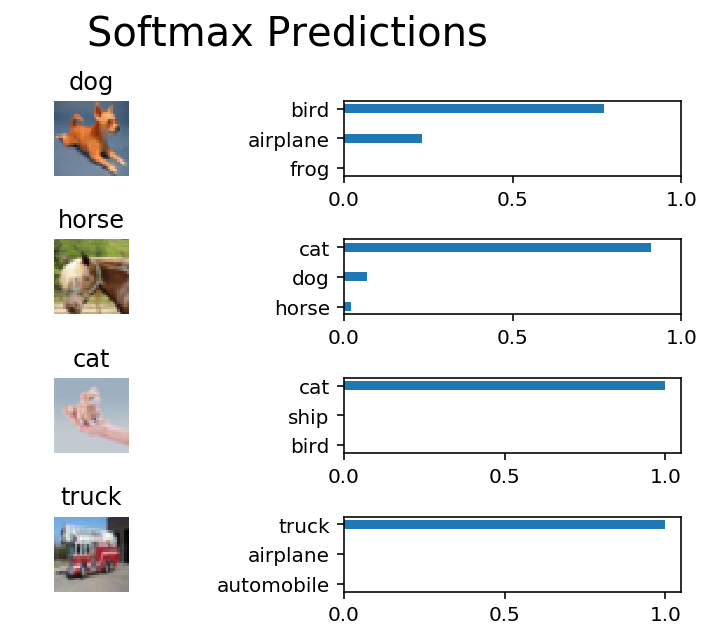

In [128]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()